### Part b)

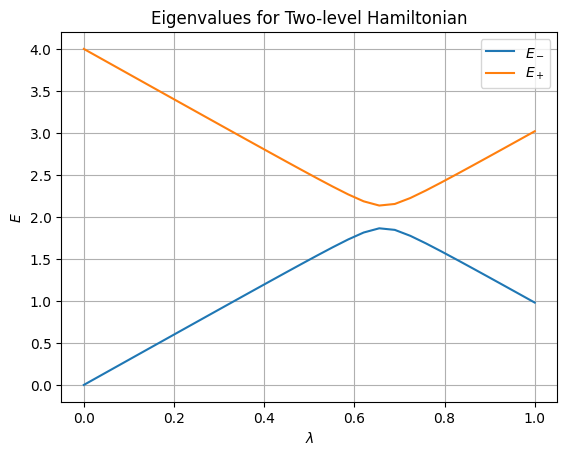

In [ ]:
import sys

from matplotlib import pyplot as plt
import numpy as np

sys.path.insert(0, "../../src/python")
from vqe_unary import numeric_energies

lambdas = np.linspace(0, 1.0, 30)
energies = numeric_energies(lambdas)

subscripts = ("-", "+")

for i in range(energies.shape[1]):
  plt.plot(lambdas, energies[:, i], label=f"$E_{subscripts[i]}$")

plt.xlabel(r"$\lambda$")
plt.ylabel(r"$E$")
plt.legend()
plt.title("Eigenvalues for Two-level Hamiltonian")
plt.grid(True)
# plt.savefig("vqe_unary_exact.pdf", format="pdf")
plt.show()

### Part c)


Processing lambda = 0.0000 (1/30)
Optimization completed after 24 epochs (0.40 seconds)
Final energy: 0.04800000
Final angles: [3.29881302 3.33738572]

Processing lambda = 0.0345 (2/30)
Epoch 50: Energy = 0.103710, Change = 0.000248
Optimization completed after 53 epochs (0.81 seconds)
Final energy: 0.10733793
Final angles: [3.11433623 3.17813367]

Processing lambda = 0.0690 (3/30)
Epoch 50: Energy = 0.207338, Change = 0.003200
Optimization completed after 55 epochs (0.80 seconds)
Final energy: 0.20651034
Final angles: [3.13322512 3.11306467]

Processing lambda = 0.1034 (4/30)
Epoch 50: Energy = 0.309890, Change = 0.001862
Early stopping after 65 epochs with no improvement
Optimization completed after 65 epochs (1.01 seconds)
Final energy: 0.31026207
Final angles: [ 0.0145083  -0.00376865]

Processing lambda = 0.1379 (5/30)
Epoch 50: Energy = 0.439641, Change = 0.001766
Early stopping after 91 epochs with no improvement
Optimization completed after 91 epochs (1.33 seconds)
Final energ

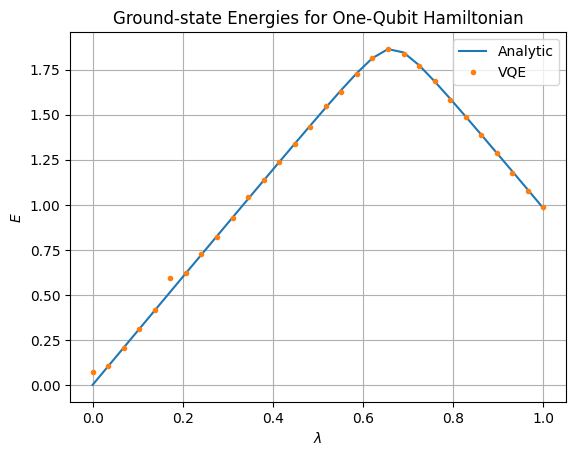

In [ ]:
import sys

from matplotlib import pyplot as plt
import numpy as np

sys.path.insert(0, "../../src/python")
from vqe_unary import (
  analytic_energies,
  energy_expectation,
)  # , qiskit_energy_expectation
from vqe_utils import vqe_energies  # , scipy_vqe_energies

np.random.seed(42)

shots = 1000
learning_rate = 0.1
epochs = 500
lambdas = np.linspace(0, 1.0, 30)

energies_approx, _, _ = vqe_energies(
  2, energy_expectation, lambdas, shots, epochs, learning_rate, "adam", True
)
# energies_approx = scipy_vqe_energies(2, energy_expectation, lambdas, shots, "Powell", 1000, 1e-5)

energies_exact = analytic_energies(lambdas)

plt.plot(lambdas, energies_exact[:, 0], label="Analytic")
plt.plot(lambdas, energies_approx, marker=".", linestyle="None", label="VQE")
plt.xlabel(r"$\lambda$")
plt.ylabel(r"$E$")
plt.title("Ground-state Energies for One-Qubit Hamiltonian")
plt.grid(True)
plt.legend()
# plt.savefig("vqe_unary_result.pdf", format="pdf")
plt.show()